#### 모델링 : 함수 찾기
- 집의 평수를 알면 가격을 알수 있을까?
- Y = aX + b
- 데이터를 잘 설명하는 직선 하나를 찾는것이 모델링
#### 손으로 숫자를 그린 이미지를 보고 숫자 7인지 맞출수 있을까?
- 아주 복합한 결정경계를 그린다. 경계를 그려주는 함수를 찾아내는 과정
#### ANN 인공신경망
- 단일층 : 신경망이 하나 퍼셉트론 1 x 1 -> 뉴런

#### 활성화함수...
- 계단함수
- 시그모이드 : 연속적인 값을 출력 - 미분이 가능 - 오차 역전파
- 활성화 함수가 없다...f(z) = z 
- y = ( W100 * .... W1 )X -> 거대한 1층짜리 선형모델
- 초기 활성화 함수
    - 계단 함수 if x > 0  1
    -               x <= 0

- 시그모이드


#### 다층신경망 MLP 퍼셉트론을 여러개 쌓아서 올린구조
- input layer : 데이터가 들어어오는곳(뉴런수 데이터의 특성 28 * 28 = 784)
- hidden layer : 입력과 출력 사이에 있는 레이어

In [2]:
%pip install scikit-learn tensorflow

  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl (332.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
# MNIST 데이터셋 로드
from sklearn.datasets import fetch_openml
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')

In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [10]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

7
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  16  28   0   0   0   9  77 153
  254 254 254 235  62   5   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  24 204 240 177 128 129 

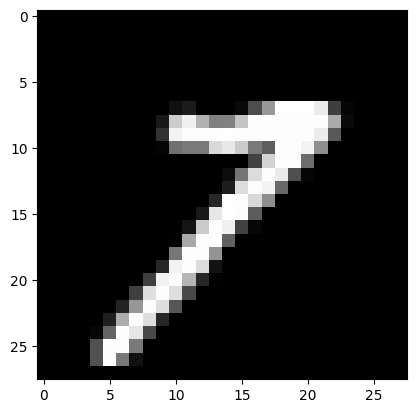

In [20]:
print(y_train[511])
plt.imshow(x_train[511], cmap='gray')
print(x_train[511])

In [23]:
# 스케일링 표준화
x_train = x_train / 255.0
x_test = x_test / 255.0



- 정답의 종류 클래스
#### 소프트맥스 - 전체클래스중에서 하나 선택 - 전체 10개중에서 정답이 1개일 경우
- 확률 전체 클래스에 대해서 0~1 다 합치면 1되는 구조 0.2 0.6 0.2
#### 시그모이드 - 다중 클래스 전체 10개중에서 정답이 여러개일 때
- 각 클래스에 대해서 확률을 0~1 사이로 변환 0.8 0.9 0.1

In [36]:
model = tf.keras.Sequential([
    # 1층 입력층: 28 x 28 2D → 784 1D로 변환
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    # 은닉층: 128개 뉴런, ReLU 활성화 함수
    tf.keras.layers.Dense(128, activation='relu'),
    
    # 출력층: 10개 뉴런 (0~9 숫자), Softmax 활성화 함수 (수정됨!)
    tf.keras.layers.Dense(10, activation='softmax')  # sigmoid → softmax
])

print("🧠 신경망 모델 구조:")
model.summary()

print("\n📊 각 층별 파라미터 수:")
print("1️⃣ Flatten: 0개 (변환만 수행)")
print("2️⃣ Dense(128): 784×128 + 128 = 100,480개")
print("3️⃣ Dense(10): 128×10 + 10 = 1,290개")
print(f"총 파라미터: {model.count_params():,}개")

🧠 신경망 모델 구조:


c:\Users\31799\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)


📊 각 층별 파라미터 수:
1️⃣ Flatten: 0개 (변환만 수행)
2️⃣ Dense(128): 784×128 + 128 = 100,480개
3️⃣ Dense(10): 128×10 + 10 = 1,290개
총 파라미터: 101,770개


In [38]:
model.compile(
    optimizer='adam', # 빠르고 안정적인
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [39]:
history = model.fit(
    x_train,
    y_train,
    epochs = 20,
    validation_data = (x_test, y_test),
    verbose = 1 # 로그 출력
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7322 - loss: 1.1546 - val_accuracy: 0.8593 - val_loss: 0.5763
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8747 - loss: 0.4795 - val_accuracy: 0.8950 - val_loss: 0.3991
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8956 - loss: 0.3796 - val_accuracy: 0.9049 - val_loss: 0.3411
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9046 - loss: 0.3402 - val_accuracy: 0.9093 - val_loss: 0.3157
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9094 - loss: 0.3183 - val_accuracy: 0.9149 - val_loss: 0.2998
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9136 - loss: 0.3026 - val_accuracy: 0.9150 - val_loss: 0.2941
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9166 - loss: 0.2909 - val_accuracy: 0.9197 - val_loss: 0.2771
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9198 - loss: 0.2805 - 

In [40]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

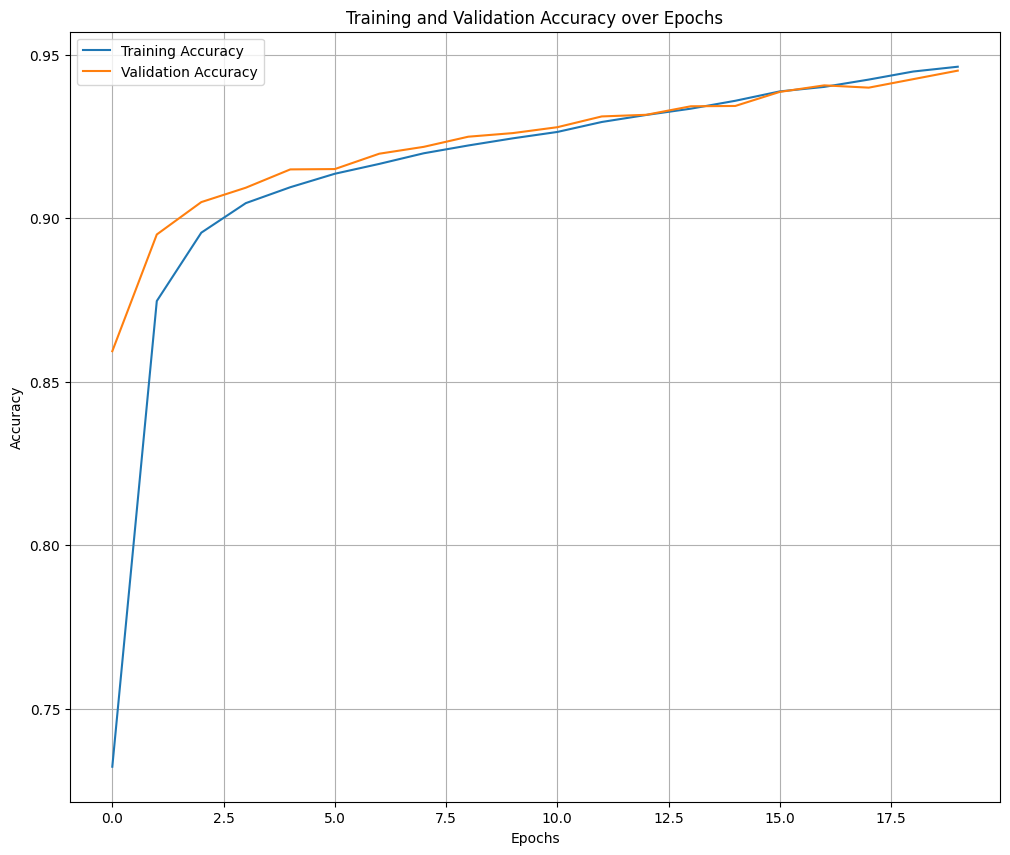

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 10))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [46]:
pred = model.predict(x_test)
pred[0], y_test[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 736us/step


(array([2.6586012e-04, 4.9599320e-09, 3.5722245e-04, 9.5486194e-03,
        6.3907905e-08, 4.3930791e-05, 5.5328730e-10, 9.8956430e-01,
        1.4432614e-05, 2.0561050e-04], dtype=float32),
 np.uint8(7))

In [49]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9451 - loss: 0.1912


[0.19120639562606812, 0.9451000094413757]

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.95      0.93      0.94      1032
           3       0.92      0.95      0.94      1010
           4       0.95      0.95      0.95       982
           5       0.94      0.90      0.92       892
           6       0.95      0.96      0.95       958
           7       0.96      0.94      0.95      1028
           8       0.92      0.92      0.92       974
           9       0.94      0.93      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.95      0.95      0.94     10000

